In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer         
from sklearn.feature_extraction.text import TfidfVectorizer     
import gensim

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import time
import pickle

In [216]:
data = pd.read_csv("data/Reviews.csv")

In [217]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [218]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [219]:
data.shape

(568454, 10)

In [220]:
data = data[data['Score'] != 3]

In [221]:
data.Score.unique()

array([5, 1, 4, 2])

In [222]:
data['Score'].value_counts()

5    363122
4     80655
1     52268
2     29769
Name: Score, dtype: int64

In [223]:
def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

score = data['Score']
temp = score.map(partition)
data['Score'] = temp

In [224]:
data = data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"})

In [225]:
data = data[data['HelpfulnessNumerator'] <= data['HelpfulnessDenominator']]

In [226]:
data = data.iloc[:100000,:]

In [227]:
data_X = data['Text']
data_Y = data['Score']

In [228]:
data_Y.values[1]

'negative'

In [229]:
print(set(stopwords.words('english')))

{'being', 'through', 'now', 'where', 'be', 'very', "weren't", "don't", 'hadn', 'were', 'didn', 'for', 'yours', 'couldn', 'of', 'these', 'ourselves', 'at', 'mightn', 'myself', 'ours', 'him', 'by', "it's", 'haven', 'doesn', "wasn't", 'in', 'll', 'further', 'won', 'all', 'them', 'whom', 'had', 'and', 'my', 'when', 'those', 'into', 'nor', 'an', 'only', "should've", "shan't", 'am', 'own', 'between', 'their', 'i', 'same', 'so', 'm', 'y', 'does', 'itself', "shouldn't", "aren't", 'from', 'd', 'most', 'yourselves', 'has', 'did', 'such', 'weren', 'it', 'theirs', 'up', 'some', "mightn't", 'out', 'more', "isn't", "you're", 'who', 'wasn', 'after', 'we', 'against', 't', 'themselves', 'how', 'than', 're', 'her', 'can', 'any', "needn't", 'our', 'not', "mustn't", 'over', 'should', "that'll", 'just', 'isn', 'is', 'during', "doesn't", 'until', 'while', 'as', 'what', "she's", 'ma', 'about', "couldn't", 'under', "you'll", 'the', 'each', 'don', 'his', 'are', 've', 'shan', "you've", 'this', 's', 'was', "woul

In [12]:
import re
snow = nltk.stem.SnowballStemmer('english')
stop = set(stopwords.words('english'))

def cleanhtml(sentence):
    sentence = sentence.lower()                                       # Converting to lowercase
    cleanr = re.compile('<.*?>')
    sentence = re.sub(cleanr, ' ', sentence)                          # Cleaning Html tags
    
    return sentence

def cleanpunc(sentence):
    sentence = re.sub('[^A-Za-z0-9]+', '', sentence)                # Cleaning punctuations
    
    return sentence

In [231]:
temp = []
str1 = ''
positive_words = []
negative_words = []
i = 0
for sentence in data_X:
    words = []
    sentence = cleanhtml(sentence)
    for word in sentence.split():
        word = cleanpunc(word)
        if((word.isalpha()) & (len(word) > 2)): 
            if word not in stop:
                s = snow.stem(word).encode('utf8')
                words.append(s)
                if (data_Y.values)[i] == 'positive': 
                    positive_words.append(s) #list of all words used to describe positive reviews.
                if(data_Y.values)[i] == 'negative':
                    negative_words.append(s) #list of all words used to describe negative reviews.
            else:
                continue
        else:
                continue
    str1 = b" ".join(words)
    temp.append(str1)
    i += 1

In [261]:
temp[:10]

[b'bought sever vital can dog food product found good qualiti product look like stew process meat smell better labrador finicki appreci product better',
 b'product arriv label jumbo salt peanutsth peanut actual small size unsalt sure error vendor intend repres product jumbo',
 b'confect around centuri light pillowi citrus gelatin nut case filbert cut tini squar liber coat powder sugar tini mouth heaven chewi flavor high recommend yummi treat familiar stori lewi lion witch wardrob treat seduc edmund sell brother sister witch',
 b'look secret ingredi robitussin believ found got addit root beer extract order good made cherri soda flavor medicin',
 b'great taffi great price wide assort yummi taffi deliveri quick taffi lover deal',
 b'got wild hair taffi order five pound bag taffi enjoy mani flavor watermelon root beer melon peppermint grape etc complaint bit much redblack licoriceflavor piec particular favorit kid husband last two week would recommend brand taffi delight treat',
 b'saltwat

In [262]:
data_X = temp

In [263]:
df = pd.DataFrame(list(zip(data_X, data_Y)), columns = ['Text', 'Sentiment'] )

In [3]:
df.to_pickle('data/cleaned_file.pkl')

NameError: name 'df' is not defined

In [4]:
df = pd.read_pickle('data/cleaned_file.pkl')

In [5]:
df.head()

,Text,Sentiment
0,b'bought sever vital can dog food product foun...,positive
1,b'product arriv label jumbo salt peanutsth pea...,negative
2,b'confect around centuri light pillowi citrus ...,positive
3,b'look secret ingredi robitussin believ found ...,negative
4,b'great taffi great price wide assort yummi ta...,positive


In [6]:
df['Text'][2]

b'confect around centuri light pillowi citrus gelatin nut case filbert cut tini squar liber coat powder sugar tini mouth heaven chewi flavor high recommend yummi treat familiar stori lewi lion witch wardrob treat seduc edmund sell brother sister witch'

In [7]:
X = df["Text"]
y = df["Sentiment"]

In [8]:
df.shape, X.shape, y.shape

((100000, 2), (100000,), (100000,))

## Word2Vec 

In [9]:
from gensim.models import Word2Vec
import math

In [10]:
X_1 = X[:math.ceil(len(df)*0.8)]
y_1 = y[:math.ceil(len(df)*0.8)]
X_test = X[math.ceil(len(df)*0.8):]
y_test = y[math.ceil(len(df)*0.8):]

X_train = X_1[:math.ceil(len(df)*0.6)]
y_train = y_1[:math.ceil(len(df)*0.6)]
X_cv = X_1[math.ceil(len(df)*0.6):]
y_cv = y_1[math.ceil(len(df)*0.6):]

print(X_train.shape, y_train.shape, X_cv.shape, X_test.shape)

(60000,) (60000,) (20000,) (20000,)


In [13]:
list_of_sentence = []
for sentence in X_train:
    words = []
    sentence = sentence.decode('utf-8')
    sentence = cleanhtml(sentence)
    for word in sentence.split():
        word = cleanpunc(word)
        if(word.isalpha()):    
            words.append(word)
        else:
            continue 
    list_of_sentence.append(words)

In [14]:
print(list_of_sentence[:5])

[['bought', 'sever', 'vital', 'can', 'dog', 'food', 'product', 'found', 'good', 'qualiti', 'product', 'look', 'like', 'stew', 'process', 'meat', 'smell', 'better', 'labrador', 'finicki', 'appreci', 'product', 'better'], ['product', 'arriv', 'label', 'jumbo', 'salt', 'peanutsth', 'peanut', 'actual', 'small', 'size', 'unsalt', 'sure', 'error', 'vendor', 'intend', 'repres', 'product', 'jumbo'], ['confect', 'around', 'centuri', 'light', 'pillowi', 'citrus', 'gelatin', 'nut', 'case', 'filbert', 'cut', 'tini', 'squar', 'liber', 'coat', 'powder', 'sugar', 'tini', 'mouth', 'heaven', 'chewi', 'flavor', 'high', 'recommend', 'yummi', 'treat', 'familiar', 'stori', 'lewi', 'lion', 'witch', 'wardrob', 'treat', 'seduc', 'edmund', 'sell', 'brother', 'sister', 'witch'], ['look', 'secret', 'ingredi', 'robitussin', 'believ', 'found', 'got', 'addit', 'root', 'beer', 'extract', 'order', 'good', 'made', 'cherri', 'soda', 'flavor', 'medicin'], ['great', 'taffi', 'great', 'price', 'wide', 'assort', 'yummi', '

In [15]:
len(list_of_sentence)

60000

In [16]:
w2v_model = gensim.models.Word2Vec(list_of_sentence, min_count = 5, size = 50, workers = 4)

In [17]:
print(w2v_model.wv)

In [18]:
w2v_vocab = list(w2v_model.wv.vocab)

In [19]:
print(w2v_vocab[:50])

['bought', 'sever', 'vital', 'can', 'dog', 'food', 'product', 'found', 'good', 'qualiti', 'look', 'like', 'stew', 'process', 'meat', 'smell', 'better', 'labrador', 'finicki', 'appreci', 'arriv', 'label', 'jumbo', 'salt', 'peanut', 'actual', 'small', 'size', 'unsalt', 'sure', 'error', 'vendor', 'intend', 'repres', 'confect', 'around', 'centuri', 'light', 'citrus', 'gelatin', 'nut', 'case', 'cut', 'tini', 'squar', 'liber', 'coat', 'powder', 'sugar', 'mouth']


In [20]:
sim_words = w2v_model.wv.most_similar('bought')

In [21]:
sim_words[:10]

[('purchas', 0.7504637241363525),
 ('saw', 0.6907180547714233),
 ('discov', 0.6165358424186707),
 ('got', 0.6129366159439087),
 ('order', 0.5996208786964417),
 ('sold', 0.5914081931114197),
 ('buy', 0.5908170938491821),
 ('sell', 0.5566126704216003),
 ('pick', 0.5524014830589294),
 ('found', 0.5521510243415833)]

## Average Word2Vec 

In [22]:
from tqdm import tqdm

corpus_embedding = []
for sentence in tqdm(X_train):
#     print(sentence)
#     break
    sentence = sentence.decode('utf-8')
    sentence_embedding = np.zeros(50)
    count_words = 0
    for word in sentence.split():
        if word in w2v_vocab:
            embedding = w2v_model.wv[word]
            sentence_embedding += embedding
            count_words += 1
    if count_words != 0:
        sentence_embedding /= count_words
    corpus_embedding.append(sentence_embedding)

100%|███████████████████████████████████████████████████████████████████████████| 60000/60000 [09:04<00:00, 110.19it/s]


In [23]:
print(len(corpus_embedding))
print(len(corpus_embedding[0]))
corpus_embedding[:2]

60000
50


[array([-0.33130724,  0.11990186,  0.43478317, -0.11587354, -0.87735569,
         0.04477178,  0.03932247,  0.07246874,  0.67233599, -0.45780072,
         0.3833971 ,  0.06984988,  0.0836829 ,  0.71263175,  0.18682502,
        -0.20744671,  0.26407639, -0.31573227, -0.19760946,  0.27243814,
         0.44060848, -0.53665292, -0.47823442,  0.32104788,  0.09931615,
        -0.04016587,  0.55143294,  0.92508096, -1.05282973,  0.09649807,
         0.28540477,  0.99195741, -0.16110061, -0.03687218, -0.26790218,
        -0.27366251, -0.05225336, -0.93082341,  0.70776327,  0.60222271,
        -0.21371359, -0.27765007,  0.14290504,  0.03360347, -0.59941397,
        -0.3228745 , -0.0435011 ,  0.06757492,  1.28469443, -0.16538062]),
 array([-0.05223032, -0.40994629, -0.01446591, -0.35458623,  0.60434626,
        -0.74623798, -0.22499154,  0.18290682,  0.49391777,  0.39002764,
         0.0183642 , -0.31606885,  0.30914688,  0.71051544, -0.34783461,
         0.3964506 ,  0.57050452, -0.03449809,  0

In [24]:
corpus_embedding_test = []
for sentence in tqdm(X_test.values):
    sentence = sentence.decode('utf-8')
    sentence_embedding = np.zeros(50)
    count_words = 0
    for word in sentence.split():
        if word in w2v_vocab:
            embedding = w2v_model.wv[word]
            sentence_embedding += embedding
            count_words += 1
    if count_words != 0:
        sentence_embedding /= count_words
    corpus_embedding_test.append(sentence_embedding)

100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [02:07<00:00, 156.82it/s]


In [25]:
print(len(corpus_embedding_test))
print(len(corpus_embedding_test[0]))
corpus_embedding_test[:2]

20000
50


[array([-0.64219781,  0.06740877,  0.08754155,  0.12697695, -0.1502211 ,
         0.76158518, -0.00311252, -0.00210324, -0.50045735,  0.3017621 ,
        -0.35582948, -0.27375816,  0.51284131,  0.59248943, -0.44766357,
         0.29323504,  0.58544105,  0.55842707,  0.36864084,  0.25890433,
         0.27340013,  0.46039771, -0.01128547, -0.18316338,  0.03403593,
        -0.42852439,  0.49342787,  0.54974348, -1.01935179,  0.24497165,
         0.01163171, -0.05291017,  0.08891718, -0.09389858,  0.1408757 ,
         0.18058104,  0.21776713,  0.03522105,  0.36759484, -0.68878087,
        -0.45319324,  0.56411022, -0.55572345, -0.39961717, -1.21297776,
        -0.92817556,  0.38507282,  0.73632854,  0.30057878,  0.04368791]),
 array([-0.33029165, -0.02694115,  0.43766838,  0.63946401, -0.03411923,
         0.39260531, -0.01401077, -0.05555625, -0.33564641,  0.56283167,
         0.5305424 , -0.17874585,  0.66348524,  0.94511398, -0.03189868,
        -0.24657405,  0.31136622,  0.53559775,  0

In [26]:
corpus_embedding_cv = []
for sentence in tqdm(X_cv.values):
    sentence = sentence.decode('utf-8')
    sentence_embedding = np.zeros(50)
    count_words = 0
    for word in sentence.split():
        if word in w2v_vocab:
            embedding = w2v_model.wv[word]
            sentence_embedding += embedding
            count_words += 1
    if count_words != 0:
        sentence_embedding /= count_words
    corpus_embedding_cv.append(sentence_embedding)

100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [01:47<00:00, 186.75it/s]


In [27]:
print(len(corpus_embedding_cv))
print(len(corpus_embedding_cv[0]))
corpus_embedding_cv[:2]

20000
50


[array([-0.74476518,  0.26034909,  0.01905033, -0.55698551, -1.22881328,
        -0.07398895,  0.58559934, -0.3726443 ,  0.13380762,  0.57872063,
         0.392193  ,  0.49814428, -0.61600011,  0.42974481,  0.30879504,
         0.611089  , -0.08647984, -0.11032755,  0.48093092,  0.83139319,
        -0.90896484,  0.56624815,  0.1118249 , -0.51617189,  0.52219157,
        -1.07219916,  1.2259064 , -0.2465872 , -0.9357186 ,  0.69487356,
         1.07688051,  1.00628134,  0.26630863,  1.33351499,  0.60912571,
         0.47964376,  0.79870868,  0.92598096,  0.34027716, -0.03779999,
         0.06075732,  0.06384472, -0.97680364, -0.52611819,  0.00296386,
         0.58830398,  0.51732324,  0.15407792,  0.50168068,  0.83222603]),
 array([-0.71541628, -0.01856251, -0.04557137, -0.63462695, -0.35917798,
         0.33188936, -0.39325189, -0.12285671, -0.39782767,  0.74988701,
         0.14752509,  0.45520926, -0.08383783,  0.01243648, -0.43225686,
        -0.10797379,  0.62605449,  0.08248688, -0

In [28]:
X_train_DT = corpus_embedding
X_cv_DT = corpus_embedding_cv
X_test_DT = corpus_embedding_test


The optimal depth is 8.


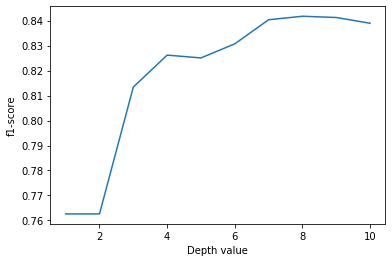

In [34]:
# from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn import tree

myList = list(np.arange(1,11))

# empty list that will hold cv scores
cv_scores = []

for depth in myList:
    DT = tree.DecisionTreeClassifier(max_depth = depth)
    scores = cross_val_score(DT, X_train_DT, y_train, cv = 5, scoring = 'f1_weighted')
    cv_scores.append(scores.mean())
    
# changing to misclassification error
scr = [x for x in cv_scores]

optimal_depth = myList[scr.index(max(scr))]
print('\nThe optimal depth is %d.' % optimal_depth)

plt.plot(myList, scr)

plt.xlabel('Depth value')
plt.ylabel('f1-score')
plt.show()

Accuracy on test set: 86.265%
Precision on test set: 0.584
Recall on test set: 0.416
F1-Score on test set: 0.486
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



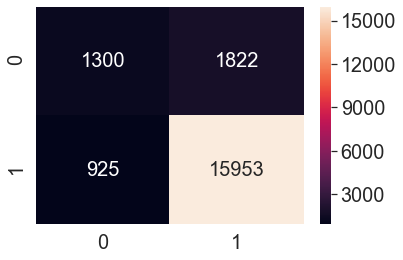

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

clf = tree.DecisionTreeClassifier(max_depth=8)
clf.fit(X_train_DT, y_train)
y_pred = clf.predict(X_test_DT)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred, pos_label="negative")))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred, pos_label="negative")))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred, pos_label="negative")))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.8)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 20}, fmt='g')
plt.show()

## Average Word2Vec with tf_idf 

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
model = TfidfVectorizer()

tf_idf_matrix = model.fit_transform(X_train.values)
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [42]:
tfidf_embedding = []
for sentence in tqdm(X_train):
    sentence = sentence.decode('utf-8')
    sentence_embedding = np.zeros(50)
    weight_sum = 0
    for word in sentence.split():
        if word in w2v_vocab:
            embedding = w2v_model.wv[word]
            tf_idf = dictionary[word] * sentence.count(word)
            sentence_embedding += (embedding * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sentence_embedding /= weight_sum
    tfidf_embedding.append(sentence_embedding)

100%|███████████████████████████████████████████████████████████████████████████| 60000/60000 [05:36<00:00, 178.11it/s]


In [43]:
tfidf_embedding[:1]

[array([-0.39507057,  0.04865201,  0.47421917, -0.0318018 , -0.80058294,
        -0.0386741 , -0.03694897,  0.22572383,  0.6794456 , -0.47496199,
         0.34024699,  0.12332821, -0.04110784,  0.55182534,  0.11362056,
        -0.21379422,  0.39268066, -0.38642998, -0.18918188,  0.19200331,
         0.34870092, -0.574394  , -0.4135111 ,  0.39263073,  0.13700051,
        -0.16553747,  0.57182365,  0.92967715, -0.84132062,  0.03609145,
         0.32041245,  0.90701136, -0.17029555,  0.0628777 , -0.14645327,
        -0.29547634, -0.00829913, -0.82583153,  0.90329702,  0.58738923,
        -0.17886315, -0.26863072,  0.17260375,  0.21191393, -0.6207026 ,
        -0.24653357, -0.08518243, -0.0436834 ,  1.11681301, -0.14349901])]

In [44]:
tfidf_embedding_test = []
for sentence in tqdm(X_test):
    sentence = sentence.decode('utf-8')
    sentence_embedding = np.zeros(50)
    weight_sum = 0
    for word in sentence.split():
        if word in w2v_vocab:
            embedding = w2v_model.wv[word]
            tf_idf = dictionary[word] * sentence.count(word)
            sentence_embedding += (embedding * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sentence_embedding /= weight_sum
    tfidf_embedding_test.append(sentence_embedding)

100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [01:52<00:00, 177.02it/s]


In [45]:
tfidf_embedding_test[:1]

[array([-0.94516692,  0.08483584,  0.04657413,  0.01605902, -0.05479704,
         0.84658052,  0.09756724,  0.12112301, -0.48066287,  0.08547119,
        -0.5777226 , -0.09305732,  0.25719165,  0.28980662, -0.4651542 ,
         0.23123447,  0.6277084 ,  0.22186503,  0.40135619,  0.25544087,
         0.19110808,  0.45380958,  0.22826479, -0.0907749 , -0.08072546,
        -0.29260841,  0.40875988,  0.53817322, -1.00864718,  0.27245711,
         0.23393184,  0.14101431, -0.04649135, -0.33272014,  0.20420662,
         0.12288305,  0.35543729,  0.26528195,  0.24319909, -0.63315135,
        -0.51594048,  0.48998324, -0.51896221, -0.24059932, -1.21929764,
        -0.9993108 ,  0.48056983,  0.69646596,  0.06372389,  0.2197149 ])]

In [46]:
tfidf_embedding_cv = []
for sentence in tqdm(X_cv):
    sentence = sentence.decode('utf-8')
    sentence_embedding = np.zeros(50)
    weight_sum = 0
    for word in sentence.split():
        if word in w2v_vocab:
            embedding = w2v_model.wv[word]
            tf_idf = dictionary[word] * sentence.count(word)
            sentence_embedding += (embedding * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sentence_embedding /= weight_sum
    tfidf_embedding_cv.append(sentence_embedding)

100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [01:56<00:00, 171.72it/s]


In [47]:
tfidf_embedding_cv[:1]

[array([-0.72726806,  0.41048944, -0.17674132, -0.61099798, -1.36879579,
        -0.2107455 ,  0.81876669, -0.27592758,  0.1851076 ,  0.69178422,
         0.35317479,  0.50677583, -0.98526806,  0.41658725,  0.5003131 ,
         0.69314527, -0.07986826, -0.52589089,  0.60564101,  1.01089873,
        -1.23761498,  0.52444286,  0.2539203 , -0.67535472,  0.61390536,
        -1.12815868,  1.39673934, -0.51108577, -0.91932568,  0.85799133,
         1.49875188,  1.13817226,  0.30412216,  1.66629285,  0.93754149,
         0.36504926,  0.90047127,  0.96694125,  0.35836667,  0.08105114,
        -0.01385142,  0.01811398, -1.09005035, -0.68774863,  0.02789835,
         0.87163866,  0.55248415,  0.16680863,  0.27908851,  1.13134782])]

In [51]:
X_train_DT = tfidf_embedding
X_cv_DT = tfidf_embedding_cv
X_test_DT = tfidf_embedding_test


The optimal depth is 8.


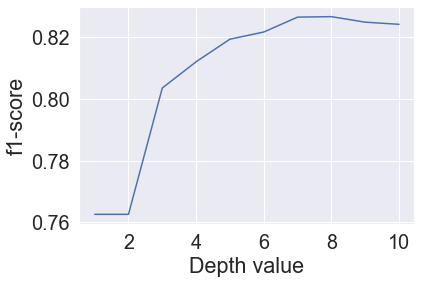

In [52]:
myList = list(np.arange(1,11))


# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for depth in myList:
    DT = tree.DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(DT, X_train_DT, y_train, cv=5, scoring='f1_weighted')
    cv_scores.append(scores.mean())

# changing to misclassification error
scr = [x for x in cv_scores]


optimal_depth = myList[scr.index(max(scr))]
print('\nThe optimal depth is %d.' % optimal_depth)

plt.plot(myList, scr)


plt.xlabel('Depth value')
plt.ylabel('f1-score')
plt.show()

Accuracy on test set: 85.620%
Precision on test set: 0.580
Recall on test set: 0.286
F1-Score on test set: 0.383
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



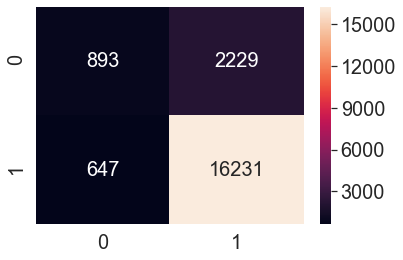

In [53]:
clf = tree.DecisionTreeClassifier(max_depth=8)
clf.fit(X_train_DT, y_train)
y_pred = clf.predict(X_test_DT)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred, pos_label="negative")))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred, pos_label="negative")))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred, pos_label="negative")))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.8)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 20}, fmt='g')
plt.show()

## bag of words

In [302]:
X = df["Text"]
y = df["Sentiment"]

In [303]:
df = df.iloc[:2000,:]

In [304]:
X_1 = X[:math.ceil(len(df)*.8)]
y_1 = y[:math.ceil(len(df)*.8)]
X_test = X[math.ceil(len(df)*.8):]
y_test = y[math.ceil(len(df)*.8):]

X_train = X_1[:math.ceil(len(df)*.6)]
y_train = y_1[:math.ceil(len(df)*.6)]
X_cv = X_1[math.ceil(len(df)*.6):]
y_cv = y_1[math.ceil(len(df)*.6):]

print(X_1.shape, y_1.shape, y_test.shape, X_train.shape, X_cv.shape)

(1600,) (1600,) (400,) (1200,) (400,)


In [305]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

count_vect = CountVectorizer() #in scikit-learn
X_train = count_vect.fit_transform(X_train)

In [306]:
X_test = count_vect.transform(X_test)
X_cv = count_vect.transform(X_cv)

In [307]:
X_train

<1200x4899 sparse matrix of type '<class 'numpy.int64'>'
	with 35259 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
myList = list(np.arange(1,11))


# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for depth in myList:
    DT = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(DT, X_train, y_train, cv=5, scoring='f1_weighted')
    cv_scores.append(scores.mean())

# changing to misclassification error
scr = [x for x in cv_scores]


optimal_depth = myList[scr.index(max(scr))]
print('\nThe optimal depth is %d.' % optimal_depth)

plt.plot(myList, scr)


plt.xlabel('Depth value')
plt.ylabel('f1-score')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=7)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred, pos_label="negative")))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred, pos_label="negative")))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred, pos_label="negative")))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.8)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 20}, fmt='g')
plt.show()

## tf_idf

In [314]:
X_1 = X[:math.ceil(len(df)*.8)]
y_1 = y[:math.ceil(len(df)*.8)]
X_test = X[math.ceil(len(df)*.8):]
y_test = y[math.ceil(len(df)*.8):]

X_train = X_1[:math.ceil(len(df)*.6)]
y_train = y_1[:math.ceil(len(df)*.6)]
X_cv = X_1[math.ceil(len(df)*.6):]
y_cv = y_1[math.ceil(len(df)*.6):]

In [315]:
tf_idf_vect = TfidfVectorizer()
X_train = tf_idf_vect.fit_transform(X_train)

In [316]:
X_test = tf_idf_vect.transform(X_test)
X_cv = tf_idf_vect.transform(X_cv)

In [317]:
X_train

<1200x4899 sparse matrix of type '<class 'numpy.float64'>'
	with 35259 stored elements in Compressed Sparse Row format>

In [ ]:
# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for depth in myList:
    DT = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(DT, X_train, y_train, cv=5, scoring='f1_weighted')
    cv_scores.append(scores.mean())

# changing to misclassification error
scr = [x for x in cv_scores]


optimal_depth = myList[scr.index(max(scr))]
print('\nThe optimal depth is %d.' % optimal_depth)

plt.plot(myList, scr)


plt.xlabel('Depth value')
plt.ylabel('f1-score')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=7)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred, pos_label="negative")))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred, pos_label="negative")))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred, pos_label="negative")))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.8)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 20}, fmt='g')
plt.show()